In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cellpose.io import imread
import os
from skimage.measure import regionprops_table
from glob import glob

In [4]:
def get_filename(filename, suffix_to_remove=None):
    # Get the file name of each image
    filename_with_ex = os.path.basename(filename).replace(':', '_').replace('\\', '_').replace('/', '_').replace('?', '_').replace('*', '_').replace('[', '_').replace(']', '_')
    filename_clear = os.path.splitext(filename_with_ex)[0]
    if suffix_to_remove and filename_clear.endswith(suffix_to_remove):
        filename_clear = filename_clear[: -len(suffix_to_remove)]
    return filename_clear

In [5]:
filepath_labels = "D:/AAA click here to explore the world/KTH KI SU/project in life science/results/Huh-7_cells results/labeled"
filepath_pi = 'D:/AAA click here to explore the world/KTH KI SU/project in life science/data/Placa1_191735'

files_labels = glob(filepath_labels + "/*_cp_masks.tif")
files_pi = glob(filepath_pi + "/*_Propidium Iodide_001.tif")

In [6]:
# Read the mask files
labels = [imread(f) for f in files_labels]
pi_channel = [imread(f) for f in files_pi]
cols = ['label', 'mean_intensity']
properties = ['label','mean_intensity']

filenames =[get_filename(f, suffix_to_remove = '_Propidium Iodide_001') for f in files_pi]

In [7]:
def get_avg_intensity(ref_img, labels, cols, properties):
    table = regionprops_table(labels, ref_img, properties=properties)
    mean_intens = pd.DataFrame(table)
    mean_intens.columns = cols
    return mean_intens

In [8]:
# Calculate mean intensities
all_mean_inten_list = []
for i,(img, label) in enumerate(zip(pi_channel, labels)):
    mean_inten = get_avg_intensity(img, label, cols, properties)
    filename_list = [filenames[i]]*len(mean_inten)
    mean_inten.insert(0, 'Image',filename_list) # Add new column for the image name
    all_mean_inten_list.append(mean_inten)

all_mean_inten = pd.concat(all_mean_inten_list, ignore_index = True)
    

In [9]:
print(all_mean_inten)

            Image  label  mean_intensity
0      E10_02_2_1      1     5069.767854
1      E10_02_2_1      2     6338.911256
2      E10_02_2_1      3     5169.507925
3      E10_02_2_1      4     5615.293390
4      E10_02_2_1      5     4011.448172
...           ...    ...             ...
12727   G9_02_2_9     51     4921.215810
12728   G9_02_2_9     52     4599.702738
12729   G9_02_2_9     53     5665.951454
12730   G9_02_2_9     54     5870.084016
12731   G9_02_2_9     55     7992.400659

[12732 rows x 3 columns]


In [42]:
# Save to csv
outpath ='D:/AAA click here to explore the world/KTH KI SU/project in life science/results/intensity'
all_mean_inten.to_csv(os.path.join(outpath, 'mean_intensity_Huh-7.csv'), sep=';')

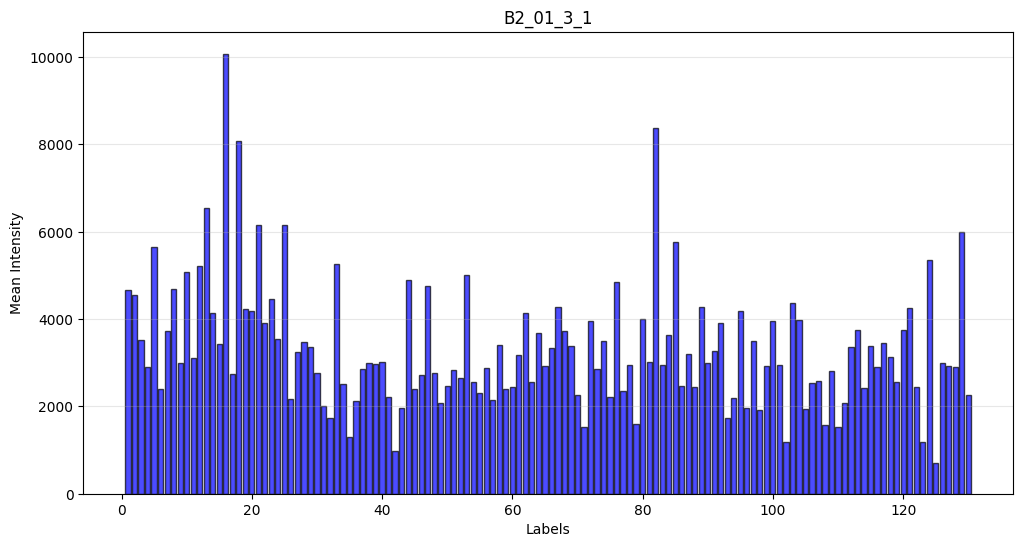

In [64]:
x = np.arange(1, len(mean_intensity['mean_intensity']) + 1)

plt.figure(figsize=(12, 6))
plt.bar(x, mean_intensity['mean_intensity'], color='blue', alpha=0.7, edgecolor='black')
plt.title('B2_01_3_1')
plt.xlabel('Labels')
plt.ylabel('Mean Intensity')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [54]:
# Load csv files
filepath = "D:/AAA click here to explore the world/KTH KI SU/project in life science/results/intensity/mean_intensity_Huh-7.csv"
data = pd.read_csv(filepath, delimiter = ';')


In [49]:
print(data)

       Unnamed: 0       Image  label  mean_intensity
0               0  B10_01_2_1      1     6018.210430
1               1  B10_01_2_1      2     5819.167867
2               2  B10_01_2_1      3     6031.571513
3               3  B10_01_2_1      4     4230.970760
4               4  B10_01_2_1      5     4608.314593
...           ...         ...    ...             ...
33224       33224   D9_01_2_9    130     3506.894163
33225       33225   D9_01_2_9    131    11851.285358
33226       33226   D9_01_2_9    132     2838.761037
33227       33227   D9_01_2_9    133     6964.632411
33228       33228   D9_01_2_9    134     3107.357602

[33229 rows x 4 columns]


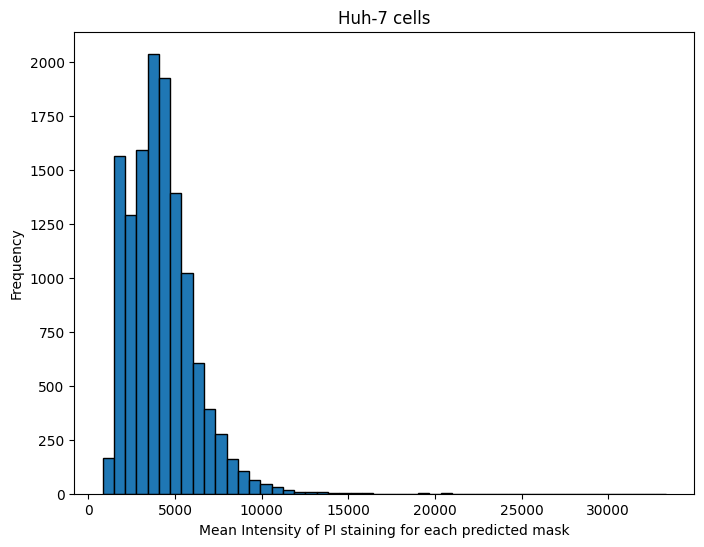

In [56]:
# draw histogram
plt.figure(figsize=(8, 6))
plt.hist(data["mean_intensity"], bins=50, edgecolor='black')
plt.xlabel('Mean Intensity of PI staining for each predicted mask')
plt.ylabel('Frequency')
plt.title('Huh-7 cells')
plt.show()